In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import sklearn

### Loading the dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dropping Unnecessary columns from the dataframe

In [3]:
df=df.drop(columns=['CustomerID',"Gender"])

In [4]:
from sklearn.cluster import KMeans
kmns=KMeans(n_clusters=5)
kmns.fit(df)

KMeans(n_clusters=5)

## Plotting the resultant cluster scatter plot

Text(0.5, 0, 'Age')

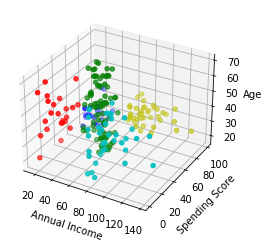

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig=plot.figure()
ax=fig.add_subplot(111,projection='3d')
X=df['Annual Income (k$)'].to_numpy()
Y=df['Spending Score (1-100)'].to_numpy()
Z=df['Age'].to_numpy()
labels=kmns.predict(df)
colmap = {1: 'r', 2:'g', 3:'b',4:'c',5:'y'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
ax.scatter(X,Y,Z,color=colors1)
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Age")


### Loading Data into df2

In [16]:
df2=pd.read_csv("Simple_Dataset.csv")
df2.head()

,x,y
0,60,30
1,7,40
2,3,52
3,38,18
4,13,38


### Finding the optimal number of clusters using elbow method

Text(0.5, 1.0, 'The  Elbow Method')

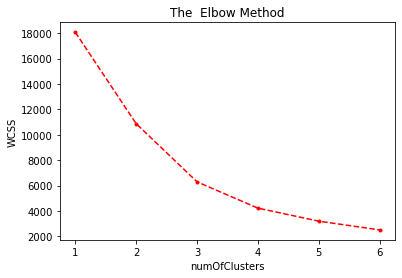

In [21]:
numOfClusters=range(1,7)
WCSS=[]
for i in numOfClusters:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    WCSS.append(kmeans.inertia_)
    
plot.plot(numOfClusters,WCSS,'r--.')
plot.xlabel("numOfClusters")
plot.ylabel("WCSS")
plot.title("The  Elbow Method")

From the above graph, we can conclude that the elbow is at 4.

### Plotting the resultant 

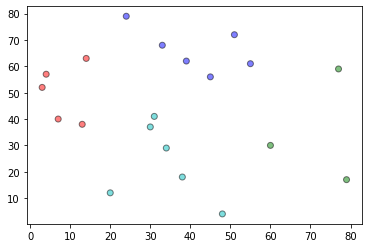

In [38]:
kmns2=KMeans(n_clusters=4)
kmns2.fit(df2)
predictions=kmns2.predict(df2)
colmap2 = {1: 'r', 2:'g', 3:'b',4:'c'}
Colors1 = map(lambda x: colmap[x+1], predictions)
Colors2 = list(Colors1)
plot.scatter(df2['x'],df2['y'], color=Colors2,alpha=0.5, edgecolor='k')